In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio 
from IPython.core.display import display, HTML 
from pandas.api.types import CategoricalDtype
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)

churn_data = pd.read_csv('churn.csv')
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Setting the static image format
png_renderer = pio.renderers['png']
png_renderer.width = 1200
png_renderer.height = 700
png_renderer.engine = 'kaleido'
pio.renderers.default = 'png'  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
 13  Customer status  10000 non-null  object 
 14  Client activity  10000 non-null  object 
dtypes: float64(2), int64(8), object(5)
memory usage: 1.1+ MB


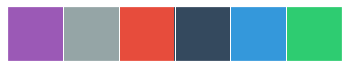

In [3]:
# Data Preprocessing
# Deleting RowNumber column
churn_data = churn_data.drop(['RowNumber'], axis = 1)

#Bringing the balance and salary to the form of "thous.$"
def change_number(number):
    return number/1000
churn_data['EstimatedSalary'] = churn_data['EstimatedSalary'].apply(change_number)
churn_data['Balance'] = churn_data['Balance'].apply(change_number)

#Bringing the 'Exited' and 'IsActiveMember' signs to the text form
def change_name(exited):
    if exited == 0:
        res = 'Loyal'
    elif exited == 1:
        res = 'Left'
    return res
churn_data['Customer status'] = churn_data['Exited'].apply(change_name)
def change_activity(active):
    if active == 0:
        res = 'Active'
    elif active == 1:
        res = 'Non-active'
    return res
churn_data['Client activity'] = churn_data['IsActiveMember'].apply(change_activity)

#Setting the color scheme
sns.set_theme(style = "darkgrid")
clrmap = ["#9b59b6", "#95a5a6", "#e74c3c", "#34495e","#3498db", "#2ecc71"]
sns.set_palette(clrmap)
sns.palplot(sns.color_palette())

churn_data.info()

## 1.The ratio between left and loyal customers

In [4]:
task_1 = churn_data['Exited'].value_counts()

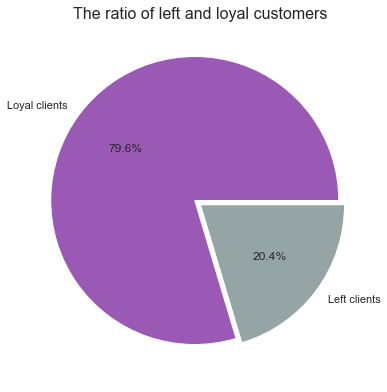

In [5]:
fig_1 = plt.figure(figsize = (5, 5))

axes_1 = fig_1.add_axes([0, 0, 1, 1])
axes_1.set_title('The ratio of left and loyal customers', fontsize = 16)
axes_1.pie(
    task_1,
    labels = ['Loyal clients', 'Left clients'],
    autopct = '%.1f%%',
    explode = [0.05, 0]
    );

fig_1.show()

A fifth of the total number of customers left the bank.

## 2. Distribution of customer's balance

In [6]:
task_2 = churn_data[churn_data['Balance'] > 2.5]

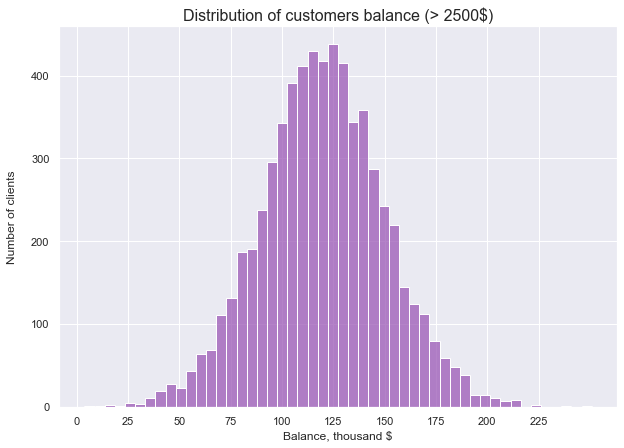

In [7]:
fig_2, axes_2 = plt.subplots(figsize = (10, 7))

axes_2.set_xticks(range(0, 250, 25))
hist_2 = sns.histplot(
    data = task_2,
    x = 'Balance',
    bins = 50,
    );
hist_2.set_title('Distribution of customers balance (> 2500$)', fontsize = 16);
hist_2.set_xlabel('Balance, thousand $');
hist_2.set_ylabel('Number of clients');
hist_2.yaxis.set_label_coords(-0.075, 0.5)

fig_2.show()

According to the histogram, it can be concluded that the balance of users who have more than $ 2500 in their account has the character of a normal distribution. For most customers, the balance value varies from 100 to 150 thousand dollars.

## 3. Distribution of the balance of left and loyal users

In [8]:
task_3 = churn_data[churn_data['Balance'] > 2.5]
task_3.groupby('Customer status')['Balance'].agg('describe').round(1)

,count,mean,std,min,25%,50%,75%,max
Customer status,,,,,,,,
Left,1537.0,120.7,30.6,3.8,103.7,119.9,138.0,250.9
Loyal,4846.0,119.5,29.9,14.3,99.1,119.8,139.7,221.5


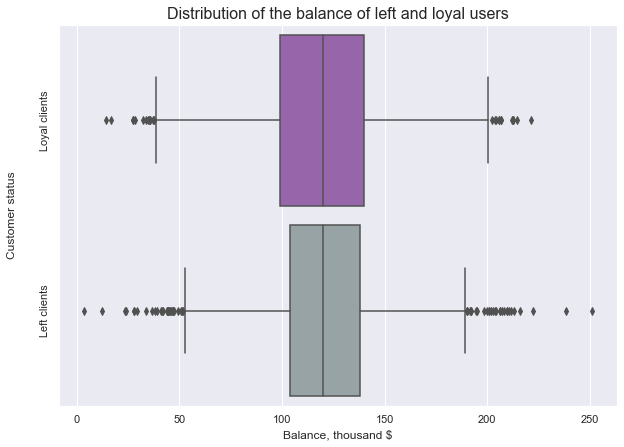

In [9]:
fig_3 = plt.figure(figsize = (10, 7));

boxplot_3 = sns.boxplot(
    data = task_3,
    y = 'Customer status',
    x = 'Balance',
    orient = 'h',
    width = 0.9
    );
boxplot_3.set_title('Distribution of the balance of left and loyal users', fontsize = 16);
boxplot_3.set_yticklabels(('Loyal clients', 'Left clients'), va = 'center');
boxplot_3.set_xlabel('Balance, thousand $');
boxplot_3.set_ylabel('Customer status');
boxplot_3.yaxis.set_tick_params(rotation = 90);
boxplot_3.yaxis.set_label_coords(-0.075, 0.5)

fig_3.show()

According to the data obtained, it can be concluded that the amounts on the savings account of left and loyal customers don't differ. The outflow of bank customers is not associated with this feature.

## 4. Distribution of the age of left and loyal users

In [10]:
churn_data.groupby('Customer status')['Age'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
Customer status,,,,,,,,
Left,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0
Loyal,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0


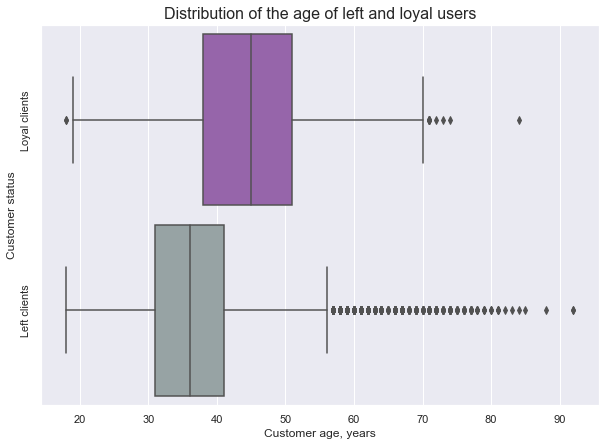

In [11]:
fig_4 = plt.figure(figsize = (10, 7));

boxplot_4 = sns.boxplot(
    data = churn_data,
    y = 'Customer status',
    x = 'Age',
    orient = 'h',
    width = 0.9
    );
boxplot_4.set_yticklabels(('Loyal clients', 'Left clients'), va = 'center');
boxplot_4.set_title('Distribution of the age of left and loyal users', fontsize = 16);
boxplot_4.set_xlabel('Customer age, years');
boxplot_4.set_ylabel('Customer status');
boxplot_4.yaxis.set_tick_params(rotation = 90);

plt.show()

The average age of loyal customers is 7 years lower, and in this group there are a significant number of anomalies in the form of age users (over 55 years old). The bank should pay attention to this audience.

## 5. The relationship between the client's credit rating and his estimated salary

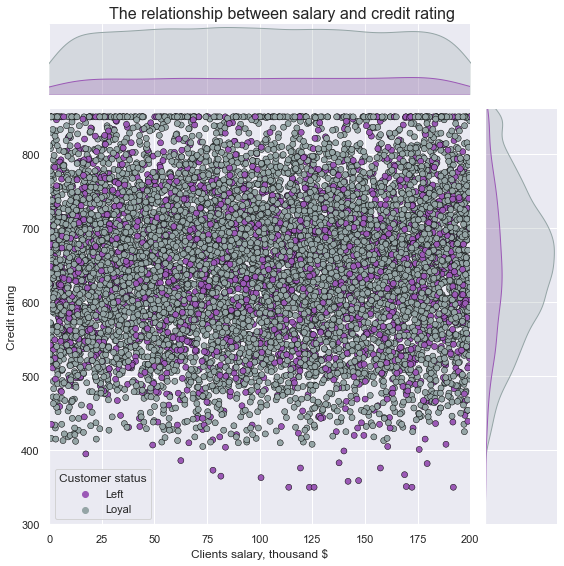

In [12]:
jointplot_5 = sns.jointplot(
    data = churn_data, 
    x = 'EstimatedSalary', 
    y = 'CreditScore',
    hue = 'Customer status',
    xlim = (0, 200),
    ylim = (300, 860),
    height = 8,
    edgecolor = 'black'
    );
jointplot_5.set_axis_labels('Clients salary, thousand $', 'Сredit rating');
jointplot_5.ax_joint.legend(title = 'Customer status');
jointplot_5.fig.suptitle('The relationship between salary and credit rating', fontsize = 16);
jointplot_5.fig.subplots_adjust(top = 0.95);

plt.show()

There is no relationship between the studied features. The most likely value of the credit rating is in the range from 600 to 700 for both groups of customers. The distribution of salaries can be considered uniform.

## 6. Percentage of customers who left

In [13]:
task_6 = (churn_data.pivot_table(
    values = 'Exited',
    index = 'Gender',
    aggfunc = 'mean',
    ).round(2)*100).reset_index()

In [14]:
task_6 

,Gender,Exited
0,Female,25.0
1,Male,16.0


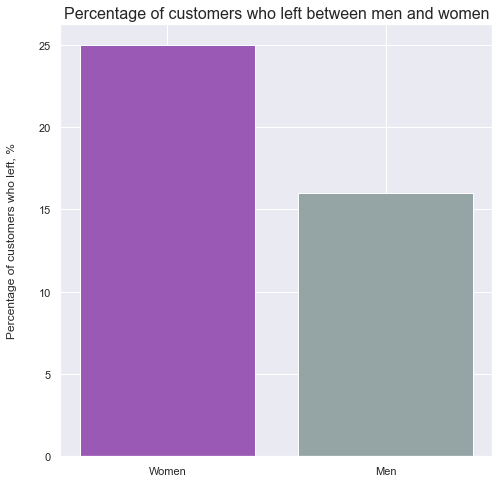

In [15]:
fig_6 = plt.figure(figsize = (6, 6));

axes_6 = fig_6.add_axes([0, 0, 1, 1]);
axes_6.set_xticklabels(['Women', 'Men']);
axes_6.bar(data = task_6, x = 'Gender', height = 'Exited', color = clrmap[0:2]);
axes_6.set_ylabel('Percentage of customers who left, %');
axes_6.yaxis.set_label_coords(-0.1, 0.5)
axes_6.set_title('Percentage of customers who left between men and women', fontsize = 16);

plt.show()

Among women, the outflow of clients is 1.5 times higher.

## 7. Outflow of customers and the number of services purchased from the bank

In [16]:
#Creating a pivot table
task_7 = churn_data.pivot_table(
    values = 'Exited',
    index = ['NumOfProducts', 'Customer status'],
    aggfunc = ['count'],
    ).reset_index().rename(columns={'count': 'Number of clients', 'Exited': '', 'NumOfProducts': 'Number of services purchased'});

#List of percentages of departed customers grouped by the number of services purchased
procent_list = list(((churn_data.pivot_table(
    values = 'Exited',
    index = 'NumOfProducts',
    aggfunc = 'mean',
    )).Exited.values*100).round(2));

display(task_7)

,Number of services purchased,Customer status,Number of clients
,,,
0,1,Left,1409
1,1,Loyal,3675
2,2,Left,348
3,2,Loyal,4242
4,3,Left,220
5,3,Loyal,46
6,4,Left,60


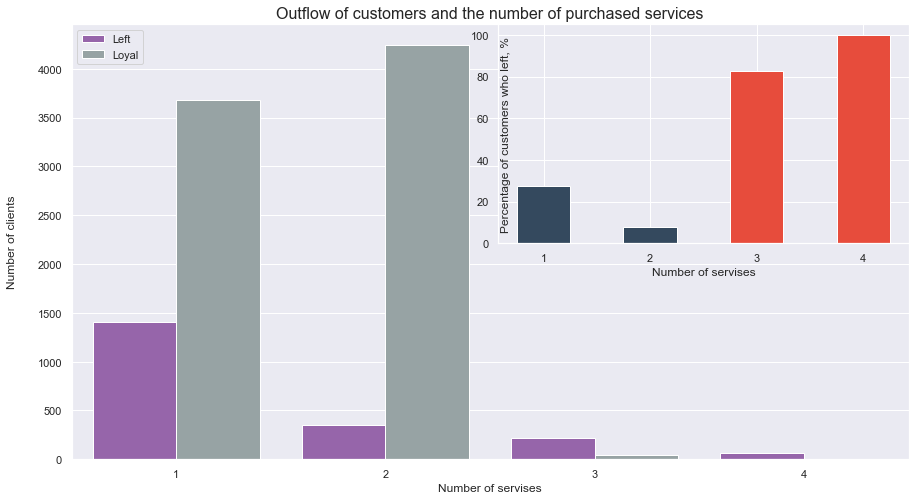

In [17]:
fig_7 = plt.figure(figsize=(15, 8))

# main chart
barplot_7 = sns.barplot(
    data = task_7,
    x = 'Number of services purchased',
    y = ('Number of clients', ''),
    hue = 'Customer status',
    );
barplot_7.set_title('Outflow of customers and the number of purchased services', fontsize=16);
barplot_7.legend(title = '');
barplot_7.set_xlabel('Number of servises');
barplot_7.set_ylabel('Number of clients');
barplot_7.yaxis.set_label_coords(-0.065, 0.5)

# a diagram showing the share of left customers with different numbers of purchased services
insert_axes_7 = fig_7.add_axes([0.52, 0.5, 0.38, 0.38]);
insert_axes_7.bar(x = task_7['Number of services purchased'].unique(), height = procent_list, width = 0.5, color = [clrmap[3] if (i < 50) else clrmap[2] for i in procent_list]);
insert_axes_7.set_ylabel('Percentage of customers who left, %');
insert_axes_7.yaxis.set_label_coords(0.03, 0.5)
insert_axes_7.set_xticks(range(1, 5, 1));
insert_axes_7.set_xlabel('Number of servises');

plt.show()

For clarity, a diagram has been added to the multi-level one, showing the share of left customers with a different number of services purchased. More than 80% of customers who purchased 3 services left the bank. All customers who purchased 4 services also left. Probably, the bank should take care of the list and quality of services provided.

## 8. The impact of the active client status on the clients outflow

In [18]:
#Creating a pivot table
task_8 = churn_data.pivot_table(
    values = 'Exited',
    index = ['Client activity', 'Customer status'],
    aggfunc = ['count'],
    ).reset_index().rename(columns={'count': 'Number of clients', 'Exited': ''});

#A list of the percentages of customers who have left, grouped by customer activity
procent_list_active = list(((churn_data.pivot_table(
    values = 'Exited',
    index = 'IsActiveMember',
    aggfunc = 'mean',
    )).Exited.values*100).round(2));

display(task_8)

,Client activity,Customer status,Number of clients
,,,
0,Active,Left,1302
1,Active,Loyal,3547
2,Non-active,Left,735
3,Non-active,Loyal,4416


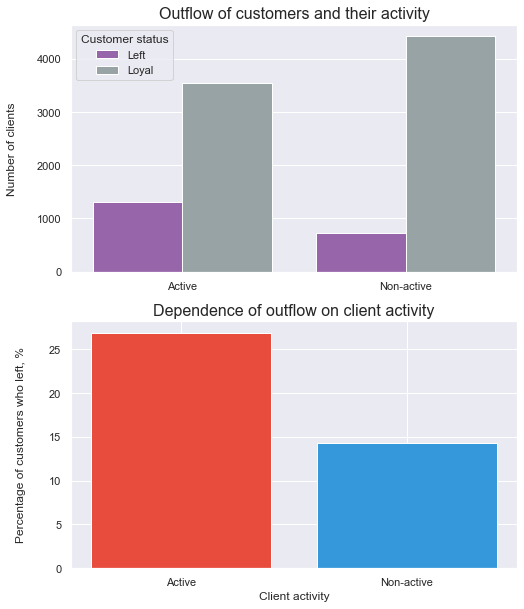

In [19]:
fig_8, axes_8 = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 10))
plt.subplots_adjust(hspace = 0.2)

# main chart
barplot_8_1 = sns.barplot(
    data = task_8,
    x = 'Client activity',
    y = 'Number of clients',
    hue = 'Customer status',
    ax = axes_8[0]
    );
barplot_8_1.set_title('Outflow of customers and their activity', fontsize=16);
barplot_8_1.yaxis.set_label_coords(-0.12, 0.5)
barplot_8_1.set_xlabel('')

# chart showing the share of left customers for active and non-active customers
axes_8[1].bar(
    x = task_8['Client activity'].unique(),
    height = procent_list_active,
    color = clrmap[2:5:2],
    );
axes_8[1].yaxis.set_label_coords(-0.1, 0.5)
axes_8[1].set_ylabel('Percentage of customers who left, %');
axes_8[1].set_title('Dependence of outflow on client activity', fontsize = 16);
axes_8[1].set_xlabel('Client activity');

plt.show()

A large proportion of customers (>50%) are inactive. Among the active, the percentage of those who left the bank is significantly higher. This can again be associated with a set of offers and services from the bank, as well as their quality.

## 9. Part of left clients by country

In [20]:
task_9 = churn_data.pivot_table(
    values = 'Exited',
    index = ['Geography', 'Customer status'],
    aggfunc = ['count'],
    ).reset_index().rename(columns={'count': 'Number of clients', 'Exited': '', 'Geography': 'Country'});

procent_list_country = list(((churn_data.pivot_table(
    values = 'Exited',
    index = 'Geography',
    aggfunc = 'mean',
    )).Exited.values*100).round(2));

display(task_9)

,Country,Customer status,Number of clients
,,,
0,France,Left,810
1,France,Loyal,4204
2,Germany,Left,814
3,Germany,Loyal,1695
4,Spain,Left,413
5,Spain,Loyal,2064


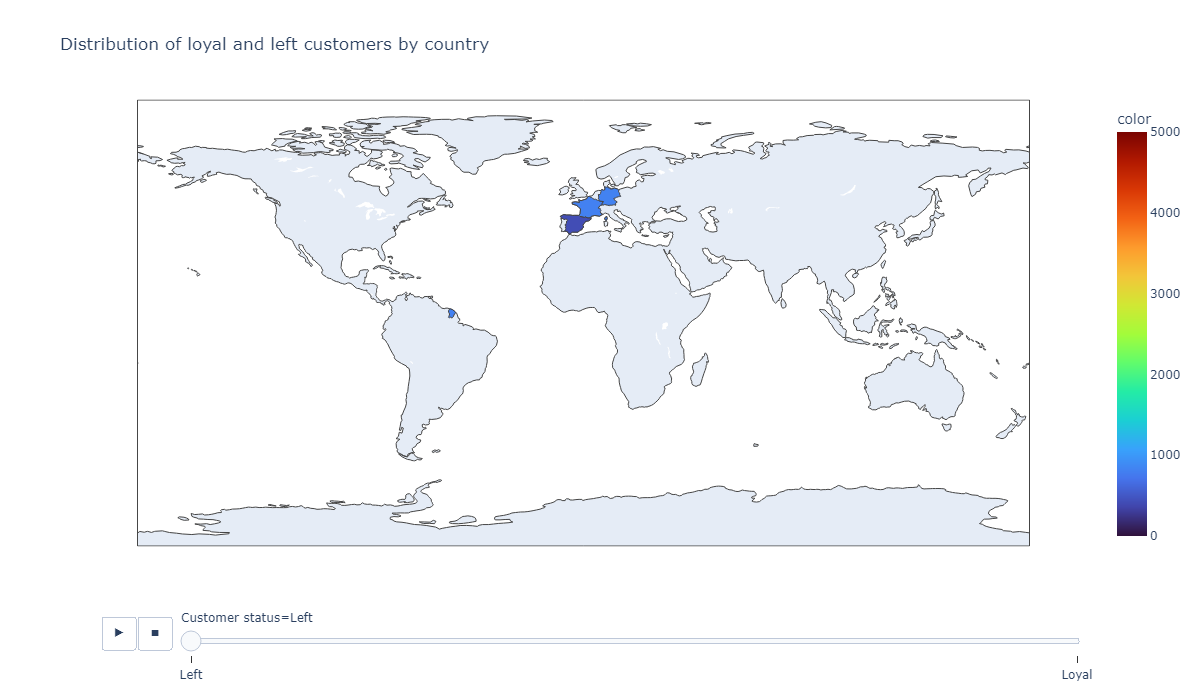

In [21]:
fig_9 = px.choropleth(
    data_frame = task_9, 
    locations = 'Country', 
    locationmode = 'country names', 
    color = task_9['Number of clients', ''].values,
    animation_frame = 'Customer status', 
    range_color = [0, 5000], 
    title = 'Distribution of loyal and left customers by country', 
    width = 800, 
    height = 500, 
    color_continuous_scale = 'Turbo'
    );

pio.write_html(fig_9, file = 'distribution of loyal and left customers by country.html', auto_open = False)

display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/Bank_customers_loyalty_Visualisation/blob/main/distribution%20of%20loyal%20and%20left%20customers%20by%20country.html">Distribution of loyal and left customers by country (Plotly)"""))

fig_9.show()

The maximum part of left customers is in Germany (although this is much better according to the summary table). This may be due to the fact that Germany has more land borders and, accordingly, access to banks and products of other European countries.

## 10. Credit rating and the number of years during which the client uses the bank's services

In [22]:
# Function for converting the Credit Score feature to categorical
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very low"
    elif credit_score >= 500 and credit_score < 601:
        return "Low"
    elif credit_score >= 601 and credit_score < 661:
        return "Middle"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Best"
    elif credit_score >= 851:
        return "Amazing"
    elif credit_score < 300:
        return "Extremely low"

# sorting categories
cat_dtype = CategoricalDtype(
    categories = ["Amazing", "Best", "Good", "Middle", "Low", "Very low", "Extremely low"], 
    ordered = True);
churn_data['CreditScore'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype(cat_dtype)

In [23]:
task_10 = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScore',
    columns = 'Tenure',
    aggfunc = 'mean',
    ).round(2)*100

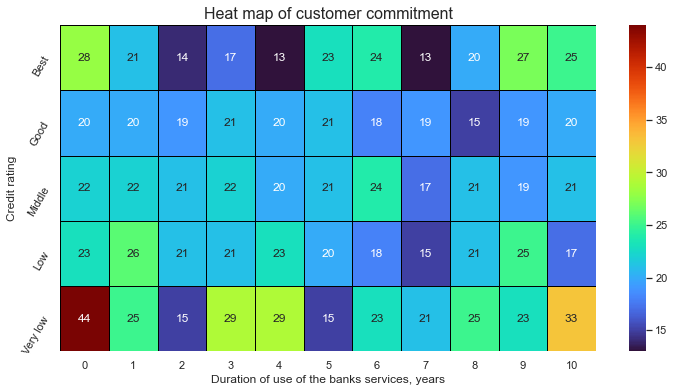

In [24]:
fig_10 = plt.figure(figsize = (12, 6));

heatmap_10 = sns.heatmap(task_10, annot = True, cmap = 'turbo', linewidths = 1, linecolor = 'black');
heatmap_10.set_title('Heat map of customer commitment', fontsize = 16);
heatmap_10.set_xlabel('Duration of use of the banks services, years');
heatmap_10.set_ylabel('Credit rating');
heatmap_10.yaxis.set_tick_params(rotation=60);

plt.show()

As expected, customers with a low credit rating and a short acquaintance period most often leave - most likely these are customers who were immediately rejected. There are anomalies among the customers with the highest rating, this is presumably due to the fact that good customers are lured away by competitors.